**For this project, the London Public Transport Network was implemented using Python.**

1. **City and Network**: Chose London, represented its public transport network using Python.

2. **Network Completeness**: Ensured every pair of nodes is connected in the network.

3. **Visual Differentiation**: Used colors to distinguish lines and stations in the visualization.

4. **Distance Attributes**: Set up edge attributes for station-to-station distances, estimated using online mapping services.

5. **Name Visualization**: Displayed line and station names on the map.

6. **Improvement Suggestions**:
   - Streamline transfers.
   - Real Time Updates and alerts.


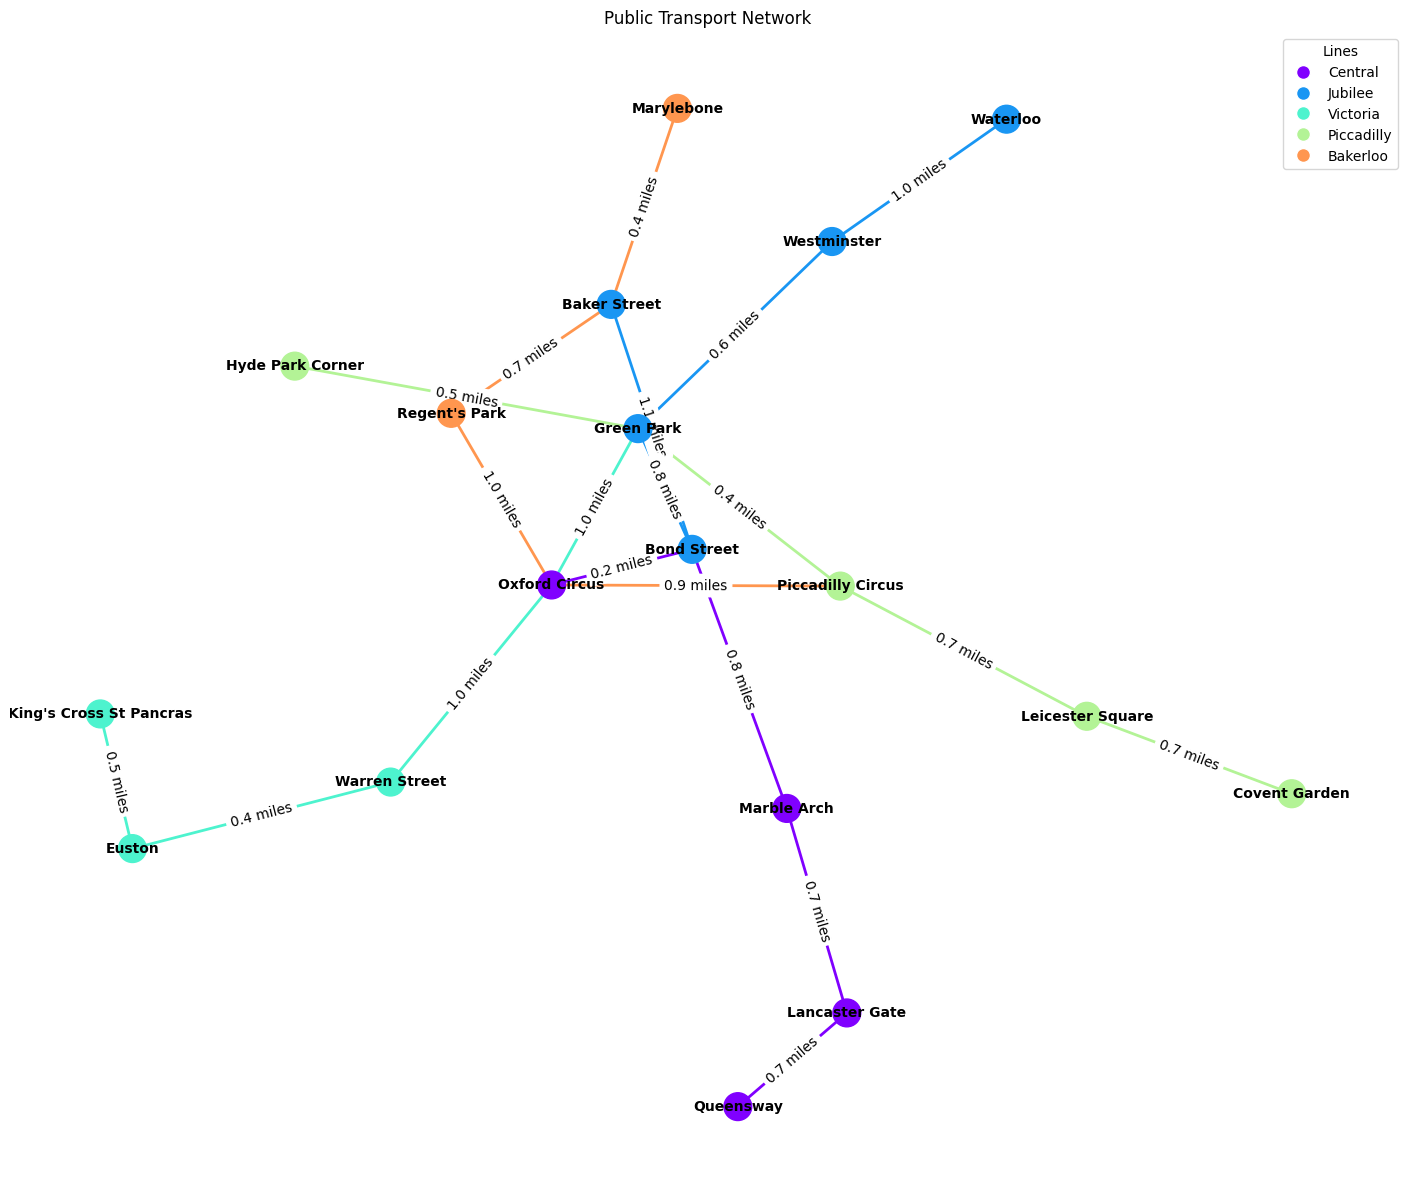

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Define the stations and edges for different lines
stations = {
    'Bakerloo': ['Marylebone', 'Baker Street',"Regent's Park", 'Oxford Circus', 'Piccadilly Circus'],
    'Victoria': ['Green Park', 'Oxford Circus', 'Warren Street', 'Euston', "King's Cross St Pancras"],
    'Central': ['Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Oxford Circus'],
    'Piccadilly': ['Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square', 'Covent Garden'],
    'Jubilee': ['Baker Street', 'Bond Street', 'Green Park', 'Westminster', 'Waterloo']
}

# Create a mapping of station pairs to real distances
real_distances = {
    ('Marylebone', 'Baker Street'): 0.4,
    ('Baker Street', "Regent's Park"): 0.7,
    ("Regent's Park", 'Oxford Circus'): 1.0,
    ('Oxford Circus', 'Piccadilly Circus'): 0.9,
    ('Green Park', 'Oxford Circus'): 1.0,
    ('Oxford Circus','Warren Street'): 1.0,
    ('Warren Street', 'Euston'): 0.4,
    ('Euston',"King's Cross St Pancras"): 0.5,
    ('Queensway', 'Lancaster Gate'): 0.7,
    ('Lancaster Gate', 'Marble Arch'): 0.7,
    ('Marble Arch', 'Bond Street'): 0.8,
    ('Bond Street', 'Oxford Circus'): 0.2,
    ('Hyde Park Corner', 'Green Park'): 0.5,
    ('Green Park','Piccadilly Circus'): 0.4,
    ('Piccadilly Circus', 'Leicester Square'): 0.7,
    ('Leicester Square', 'Covent Garden'): 0.7,
    ('Baker Street', 'Bond Street'): 1.1,
    ('Bond Street','Green Park'):0.8,
    ('Green Park', 'Westminster'): 0.6,
    ('Westminster', 'Waterloo'): 1.0,
}

# Add stations as nodes
for line, station_list in stations.items():
    for station in station_list:
        G.add_node(station, line=line)

# Add edges between adjacent stations with real distances
for line, station_list in stations.items():
    for i in range(len(station_list) - 1):
        station1 = station_list[i]
        station2 = station_list[i + 1]
        edge_distance = real_distances.get((station1, station2), real_distances.get((station2, station1), 1.0))
        G.add_edge(station1, station2, line=line, distance=edge_distance)

# Draw the graph with different colors for lines and station-to-station colors
pos = nx.spring_layout(G, seed=42, k=0.6)

# Get a list of lines for coloring
lines = list(set(nx.get_edge_attributes(G, 'line').values()))
colors = plt.cm.rainbow([i / len(lines) for i in range(len(lines))])

node_colors = [colors[lines.index(G.nodes[station]['line'])] for station in G.nodes()]

# Draw nodes and edges with labels
fig, ax = plt.subplots(figsize=(18, 15))
for line, color in zip(lines, colors):
    line_edges = [(station1, station2) for station1, station2, edge_data in G.edges(data=True) if edge_data['line'] == line]
    edge_colors = [color] * len(line_edges)
    nx.draw_networkx_edges(G, pos, edgelist=line_edges, edge_color=edge_colors, width=2.0)

# Add edge labels for distances
edge_labels = {(station1, station2): f"{G[station1][station2]['distance']} miles" for station1, station2 in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=400)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

# Create a legend for lines
legend_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=line)
                for i, line in enumerate(lines)]
plt.legend(handles=legend_lines, title='Lines', loc='best')

# Show the plot
plt.title("Public Transport Network")
plt.axis('off')
plt.show()